## Convolutional Neural Networks for image recognition

In [1]:
#Import libraries

import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
#The following two lines prevent the generation of "warnings" and "flags" when importing keras and tensorflow.
#Such warnings do not compromise the operation of the code.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Import keras and tensorflow
import keras
import tensorflow as tf
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, AveragePooling2D
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import warnings

# Save the current status of warnings
warnings.filterwarnings("ignore")

## Loading Data

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [2]:
# Loading Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
# Class analysis
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of classes: ', nClasses)
print('Classes/labels: ', classes)

Total number of classes:  10
Classes/labels:  [0 1 2 3 4 5 6 7 8 9]


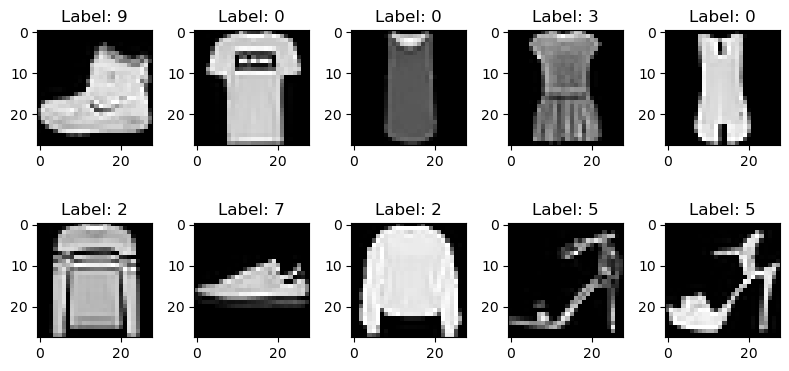

In [8]:
# Configure figure
plt.figure(figsize=(8, 4))

# Iterate over the first 10 images
for i in range(10):
    # Set up a subplot for each image
    plt.subplot(2, 5, i+1)
    
    # View current image
    plt.imshow(x_train[i], cmap='gray')
    
    # Set the title of the subplot with the corresponding labe
    plt.title("Label: {}".format(y_train[i]))


# Show images
plt.tight_layout()
plt.show()



## Processing Data

In [9]:
# Data transformation and scaling

train_X = x_train.astype('float32')
test_X = x_test.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split original training data to sub-training (80%) and validation data (20%)
train_X,valid_X,train_label,valid_label = train_test_split(train_X, y_train, test_size=0.2, random_state=1324)

print('Dimensiones de los datos de Entrenamiento: ', train_X.shape, train_label.shape)
print('Dimensiones de los datos de Validación: ', valid_X.shape, valid_label.shape)
print('Dimensiones de los datos de Testing: ', x_test.shape, y_test.shape)

# Adjust the dimensions of the training and test data
image_rows = train_X.shape[1]
image_cols = train_X.shape[2]
train_X = train_X.reshape(-1,image_rows,image_cols, 1)
test_X = test_X.reshape(-1,image_rows,image_cols, 1)

input_shape = (image_rows, image_cols, 1)

Dimensiones de los datos de Entrenamiento:  (48000, 28, 28) (48000, 10)
Dimensiones de los datos de Validación:  (12000, 28, 28) (12000, 10)
Dimensiones de los datos de Testing:  (10000, 28, 28) (10000, 10)


In [29]:
train_X.shape[0]

48000

## Model Estimation - 1st CNN model

In [11]:
#Model construction

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.2))

cnn1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())
cnn1.add(Dense(64, activation='relu'))
cnn1.add(Dense(nClasses, activation='softmax'))


In [12]:
cnn1.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [13]:
#Architecture of this CNN Model
cnn1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,698 (1.54 MB)

 Trainable params: 402,570 (1.54 MB)

 Non-trainable params: 128 (512.00 B)

### Training the model

In [14]:
import time

# Save start time
start_time = time.time()

batch_size = 256
epochs = 10

history1 = cnn1.fit(train_X, train_label,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(valid_X, valid_label))


# Calculate elapsed time
end_time = time.time()
execution_time = end_time - start_time
print("Elapsed time:", execution_time/60, "minutes")


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 0.7542 - loss: 1.3089 - val_accuracy: 0.3948 - val_loss: 1.5676
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 153ms/step - accuracy: 0.8839 - loss: 0.3137 - val_accuracy: 0.6933 - val_loss: 0.8483
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 159ms/step - accuracy: 0.8987 - loss: 0.2726 - val_accuracy: 0.8687 - val_loss: 0.3497
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 166ms/step - accuracy: 0.9070 - loss: 0.2471 - val_accuracy: 0.8662 - val_loss: 0.4076
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 164ms/step - accuracy: 0.9136 - loss: 0.2337 - val_accuracy: 0.8867 - val_loss: 0.3165
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 32s 168ms/step - accuracy: 0.9157 - loss: 0.2240 - val_accuracy: 0.8478 - val_loss: 0.4901
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 160ms/step - accuracy: 0.9216 - loss: 0.2065 - val_accuracy: 0.8747 - val_loss: 0.3592
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 183ms/step - accuracy: 0.9219 - loss: 0

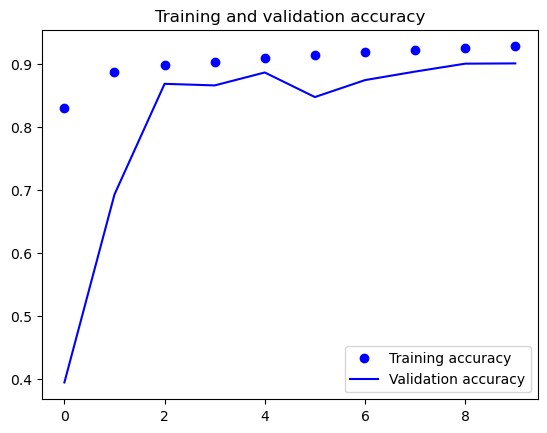

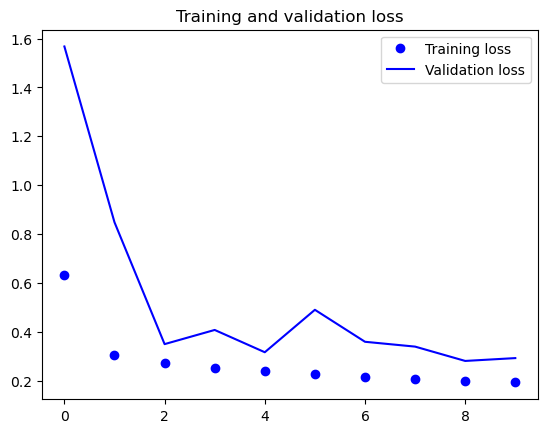

In [15]:
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Prediction quality

In [16]:
#Prediction quality

from sklearn.metrics import accuracy_score

# Obtener las predicciones del modelo en los datos de prueba
predictions = cnn1.predict(test_X)

# Convertir las predicciones en etiquetas (usando argmax si las predicciones son probabilidades)
predicted_classes = np.argmax(predictions, axis=1)

# Calcular la precisión comparando las etiquetas predichas con las etiquetas reales
accuracy = accuracy_score(np.argmax(y_test, axis=1), predicted_classes)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8953


#### Verification of model prediction and visualization of some predictions for illustrative purposes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Se encontraron 8895 labels correctos


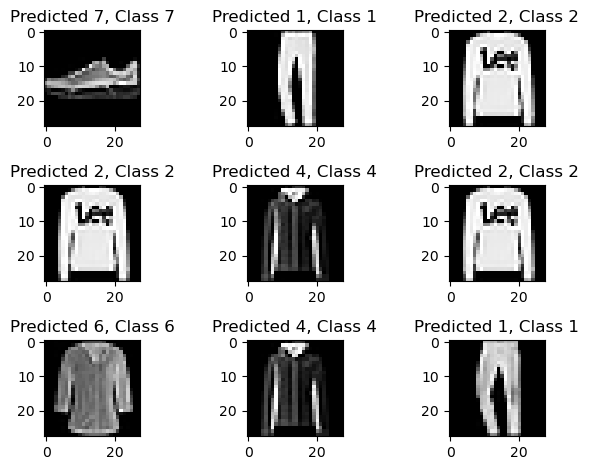

In [17]:
predicted_classes = cnn1.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
y_test_final = np.argmax(np.round(y_test), axis=1)

# Encontrar los elementos correctos
correct_mask = predicted_classes == y_test_final
correct = predicted_classes[correct_mask]
test="Se encontraron %s labels correctos" % len(correct)
print(test) 
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test_final[correct]))
plt.tight_layout()

## 2nd CNN 

In [18]:
# Definición del Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Construcción del Modelo
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(image_rows,image_cols,1),padding='same'))
fashion_model.add(BatchNormalization())
fashion_model.add(Dropout(0.2))

fashion_model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(image_rows,image_cols,1),padding='same'))
fashion_model.add(BatchNormalization())
fashion_model.add(Dropout(0.3))

fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(BatchNormalization())
fashion_model.add(Dropout(0.4))

fashion_model.add(Flatten())
fashion_model.add(Dense(64, activation='relu'))   
fashion_model.add(BatchNormalization())
fashion_model.add(Dropout(0.5))

fashion_model.add(Dense(nClasses, activation='softmax'))

fashion_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01),metrics =['accuracy'])
fashion_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,242 (3.14 MB)

 Trainable params: 822,794 (3.14 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
import time

# Guardar el tiempo de inicio
start_time = time.time()

# Tu código a ejecutar
batch_size = 256
epochs = 10
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label), callbacks=[early_stopping])

# Calcular el tiempo transcurrido
end_time = time.time()
execution_time = end_time - start_time
print("Tiempo de ejecución:", execution_time/60, "minutos")

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 110s 571ms/step - accuracy: 0.7419 - loss: 0.7674 - val_accuracy: 0.2856 - val_loss: 2.5694
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 122s 650ms/step - accuracy: 0.8632 - loss: 0.3807 - val_accuracy: 0.5410 - val_loss: 1.5016
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 657ms/step - accuracy: 0.8835 - loss: 0.3297 - val_accuracy: 0.8681 - val_loss: 0.3565
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 126s 672ms/step - accuracy: 0.8940 - loss: 0.3011 - val_accuracy: 0.9006 - val_loss: 0.2695
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 124s 659ms/step - accuracy: 0.8991 - loss: 0.2785 - val_accuracy: 0.9078 - val_loss: 0.2477
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 112s 594ms/step - accuracy: 0.9041 - loss: 0.2692 - val_accuracy: 0.8964 - val_loss: 0.2816
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 112s 596ms/step - accuracy: 0.9053 - loss: 0.2585 - val_accuracy: 0.8884 - val_loss: 0.3039
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 114s 605ms/step - accuracy: 0.9116 -

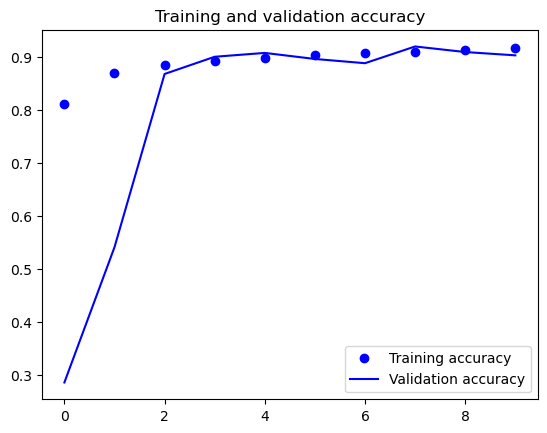

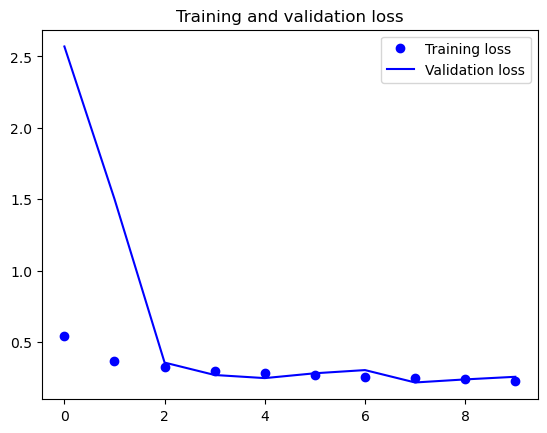

In [20]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import accuracy_score

# Obtener las predicciones del modelo en los datos de prueba
predictions = fashion_model.predict(test_X)

# Convertir las predicciones en etiquetas (usando argmax si las predicciones son probabilidades)
predicted_classes = np.argmax(predictions, axis=1)

# Calcular la precisión comparando las etiquetas predichas con las etiquetas reales
accuracy = accuracy_score(np.argmax(y_test, axis=1), predicted_classes)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Accuracy: 0.9164


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Se encontraron 9125 labels correctos


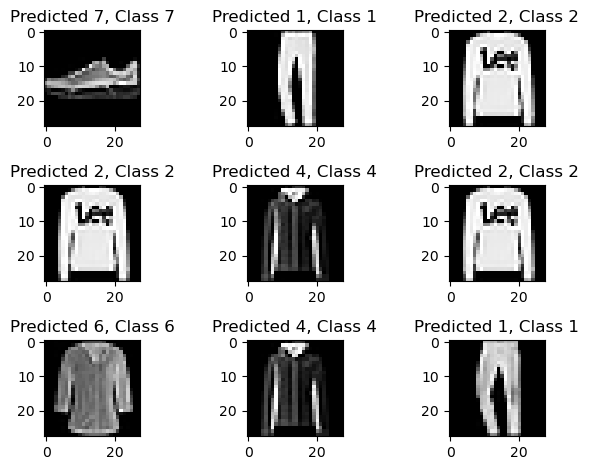

In [22]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
y_test_final = np.argmax(np.round(y_test), axis=1)

# Encontrar los elementos correctos
correct_mask = predicted_classes == y_test_final
correct = predicted_classes[correct_mask]
test="Se encontraron %s labels correctos" % len(correct)
print(test) 
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test_final[correct]))
plt.tight_layout()